In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

from wordcloud import WordCloud, STOPWORDS
import re

import imageio

In [9]:
df_3_not_re = pd.read_csv('df_3_not_re.csv')

In [11]:
df_3_not_re = df_3_not_re.drop('Unnamed: 0', axis = 1)

In [15]:
df_3_not_re.head()

,index,username,date_t,text_t,favorites,hashtags,retweets,replies,author_id,p_link,dt_date,dt_date_year,dt_date_month,dt_date_day,dt_date_min,dt_date_sec
0,12,Onlyyou1230bts,2020-12-03 23:59:54,@IMBANGBAKSA #석진생일ㅊㅋ\n#HAPPYJINDAY\n#석진아_아미가_생...,1,NaN,0,NaN,1190676407438868487,NaN,2020-12-03 23:59:54,2020,12,3,59,54
1,14,miaydizz,2020-12-03 23:59:53,@yoonmeowbit @BTS_twt THANK YOU SEOKJIN 🥺 @BTS...,0,NaN,0,NaN,1135779783822913537,NaN,2020-12-03 23:59:53,2020,12,3,59,53
2,18,yl58126824,2020-12-03 23:59:52,우와아....👀\n\n#BTS_BE #LifeGoesOn\n#방탄소년단 #BTS @...,3,NaN,3,NaN,960744597314875393,NaN,2020-12-03 23:59:52,2020,12,3,59,52
3,30,_Dooooo0,2020-12-03 23:59:47,아근데 너무 귀엽지 않니 방탄소년단 부모님 모임ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ https:/...,1,NaN,0,NaN,1219656208384057344,NaN,2020-12-03 23:59:47,2020,12,3,59,47
4,37,Jjiminyyoongii,2020-12-03 23:59:45,Happy Birthday Kim Seokjin 🌙\n\n#LePetitPrince...,2,NaN,0,NaN,1082022749722177537,NaN,2020-12-03 23:59:45,2020,12,3,59,45


In [12]:
# Basic Cleaning Text Function
def CleanText(readData, Num=False, Eng=False):

    # Remove Retweets 
    text = re.sub('RT @[\w_]+: ', '', readData)

    # Remove Mentions
    text = re.sub('@[\w_]+', '', text)

    # Remove or Replace URL 
    text = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", ' ', text) # http로 시작되는 url
    text = re.sub(r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{2,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", ' ', text) # http로 시작되지 않는 url
    
    # Remove Hashtag
    text = re.sub('[#]+[0-9a-zA-Z_]+', ' ', text)

    # Remove Garbage Words (ex. &lt, &gt, etc)
    text = re.sub('[&]+[a-z]+', ' ', text)

    # Remove Special Characters
    text = re.sub('[^0-9a-zA-Zㄱ-ㅎ가-힣]', ' ', text)
    
    # Remove newline
    text = text.replace('\n',' ')
    
    # Remove 방탄, 방탄소년단
    text = text.replace('방탄',' ')
    text = text.replace('방탄소년단',' ')
    text = text.replace('소년단',' ')
       
    
    
    
    if Num is True:
        # Remove Numbers
        text = re.sub(r'\d+',' ',text)
    
    if Eng is True:
        # Remove English 
        text = re.sub('[a-zA-Z]' , ' ', text)

    # Remove multi spacing & Reform sentence
    text = ' '.join(text.split())
       
    return text

In [13]:
df_tweet = []

In [14]:
for i in range(len(df_3_not_re)):
    
    #CleanText(df_3['text_t'][i])
    
    df_tweet.append(CleanText(df_3_not_re['text_t'][i], Num = True))

In [16]:
clean_text = CleanText(str(df_tweet))

In [20]:
STOPWORDS =['안녕하세요', '생후', '방탄소년단','방탄소년단', '방탄','온진심을','담아',
            '월에 찾아온봄', '월에찾아온봄','노래제목', '맞추기']

In [21]:
twitter_mask = imageio.imread('twitter_mask.png')

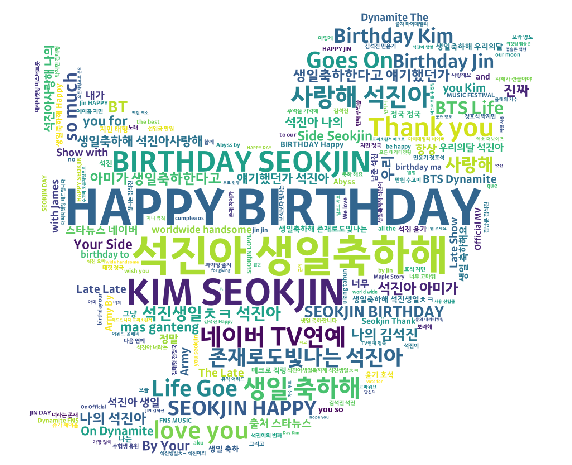

In [23]:
wordcloud = WordCloud(
                      font_path='C:/Users/kt347/AppData/Local/Microsoft/Windows/Fonts/KakaoOTFBold.otf',
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=3000,
    mask=twitter_mask
    
                     ).generate(clean_text)

fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./my_twitter_wordcloud_1.png', dpi=300)
plt.show()